# Car Parking System


# Import Packages

In [1]:
import cv2
import numpy as np
import pandas as pd
import math
import os
from matplotlib import pyplot as plt

import glob
from skimage.segmentation import slic
from skimage.color import label2rgb

## Read images from a folder and read ground truth files

In [2]:
image_list = []
for filename in glob.glob('./Parking Lot Dataset/*.jpg'):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image_list.append(img)

In [3]:
colour_groundtruth = pd.read_csv("Colour_Groundtruth.csv")
colour_groundtruth.head()

,Red,Black,White
0,18,60,26
1,18,67,24
2,15,67,21
3,14,67,23
4,23,67,23


In [4]:
Cars_groundtruth = pd.read_csv("Cars_Groundtruth.csv")
Cars_groundtruth.head()

,Parking Cars,Moving Cars,Total Cars
0,174,0,174
1,174,0,174
2,174,0,174
3,176,2,178
4,175,1,176


In [3]:
yolo_Groundtruth = pd.read_csv("yolo_Groundtruth.csv")
yolo_Groundtruth.head()

,Unnamed: 0,number of cars
0,0,174
1,1,174
2,2,174
3,3,178
4,4,176


# 1. Count car by colours 

In [5]:
# Count Red Cars
redCount = []

for img in image_list[0:200]:
    # SLIC
    SLIC_segments = slic(img, n_segments = 600, compactness = 30.0, sigma = 1)
    img_SLIC = label2rgb(SLIC_segments, image=img, kind='avg')

    # Threshold
    ret,img_th = cv2.threshold(img_SLIC,120,255,cv2.THRESH_BINARY)

    # lower bound and upper bound for Red color
    red_lower = np.array([20, 0, 0])
    red_upper = np.array([255, 100, 100])
    red_mask = cv2.inRange(img_th, red_lower, red_upper)

    # Count object
    numLabels, output_labels = cv2.connectedComponents(red_mask, 8, cv2.CV_32S)
    redCount.append(numLabels-1)

    # Red result
    red_result = cv2.bitwise_and(img, img, mask=red_mask)

print("Counted red cars:")
print(redCount)

Counted red cars:
[3, 7, 5, 4, 8, 2, 1, 4, 11, 3, 6, 7, 5, 11, 12, 11, 7, 2, 3, 1, 9, 10, 4, 5, 2, 2, 2, 1, 0, 1, 0, 2, 1, 3, 3, 1, 3, 7, 1, 3, 4, 2, 1, 7, 20, 16, 16, 20, 16, 17, 18, 18, 19, 18, 15, 17, 12, 16, 14, 15, 10, 17, 9, 14, 4, 9, 15, 6, 6, 4, 3, 5, 6, 9, 14, 9, 6, 7, 3, 4, 3, 6, 4, 5, 7, 8, 9, 0, 1, 4, 9, 12, 4, 12, 7, 1, 0, 0, 12, 14, 16, 13, 16, 12, 10, 2, 21, 15, 1, 15, 5, 7, 5, 7, 7, 1, 3, 2, 5, 2, 6, 4, 4, 1, 2, 2, 3, 2, 3, 8, 10, 8, 7, 12, 9, 17, 19, 18, 11, 16, 14, 13, 7, 7, 4, 8, 3, 2, 8, 4, 3, 3, 5, 2, 2, 2, 4, 6, 0, 11, 5, 3, 5, 4, 5, 6, 4, 4, 5, 3, 3, 0, 4, 4, 4, 4, 5, 1, 2, 9, 21, 13, 13, 26, 21, 12, 7, 9, 7, 5, 6, 7, 2, 2, 4, 9, 9, 13, 8, 13]


In [6]:
# Count White Cars
whiteCount = []

for img in image_list[0:200]:
    # lower bound and upper bound for White color
    white_lower = np.array([150, 150, 180])
    white_upper = np.array([255, 255, 255])
    white_mask = cv2.inRange(img, white_lower, white_upper)

    # Closing Operation
    kernel = np.ones((3,3),np.uint8)
    eroded = cv2.erode(white_mask, kernel, iterations = 3)
    closed = cv2.dilate(eroded, kernel, iterations = 4)
    kernel = np.ones((0,8),np.uint8)
    closed1 = cv2.dilate(closed, kernel, iterations = 6)

    # Count object
    numLabels, output_labels = cv2.connectedComponents(closed1, 8, cv2.CV_32S)
    whiteCount.append(numLabels-1)

    # White result
    white_result = cv2.bitwise_and(img, img, mask=closed1)
    
print("Counted white cars:")
print(whiteCount)

Counted white cars:
[20, 34, 23, 21, 26, 26, 28, 27, 28, 30, 28, 25, 27, 31, 28, 24, 25, 29, 23, 31, 33, 41, 1, 1, 0, 0, 0, 0, 0, 2, 3, 18, 27, 24, 31, 33, 36, 40, 34, 43, 41, 45, 43, 48, 50, 54, 53, 53, 62, 53, 55, 62, 52, 54, 59, 63, 63, 66, 44, 44, 43, 35, 42, 30, 38, 34, 24, 31, 33, 29, 34, 32, 28, 23, 31, 18, 28, 26, 24, 26, 27, 28, 32, 35, 33, 39, 43, 3, 2, 7, 6, 7, 20, 26, 24, 29, 32, 29, 49, 49, 31, 25, 22, 25, 23, 19, 38, 44, 23, 35, 28, 30, 29, 43, 34, 32, 26, 21, 27, 27, 26, 30, 27, 28, 33, 28, 31, 29, 33, 45, 55, 55, 46, 60, 57, 33, 38, 42, 43, 26, 38, 39, 43, 41, 48, 43, 34, 36, 36, 25, 29, 31, 32, 35, 28, 30, 31, 27, 0, 4, 4, 3, 4, 4, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 5, 5, 7, 7, 8, 15, 17, 20, 21, 26, 28, 29, 41, 35, 47, 24, 20, 15, 21, 20, 19, 12, 14, 12, 7, 8]


In [7]:
# Count Black Cars
blackCount = []

for img in image_list[0:200]:
    # SLIC
    SLIC_segments = slic(img, n_segments = 600, compactness = 30.0, sigma = 1)
    img_SLIC = label2rgb(SLIC_segments, image=img, kind='avg')

    # lower bound and upper bound for black color
    black_lower = np.array([0, 0, 0])
    black_upper = np.array([70, 50, 70])
    black_mask = cv2.inRange(img_SLIC, black_lower, black_upper)

    # Closing Operation
    kernel = np.ones((3,3),np.uint8)
    black_eroded = cv2.erode(black_mask, kernel, iterations = 6)
    black_closed = cv2.dilate(black_eroded, kernel, iterations = 6)

    # Count object
    numLabels, output_labels = cv2.connectedComponents(black_closed, 8, cv2.CV_32S)
    blackCount.append(numLabels-1)

    # Black result
    black_result = cv2.bitwise_and(img, img, mask=black_closed)

print("Counted black cars:")
print(blackCount)

Counted black cars:
[33, 21, 17, 19, 23, 29, 17, 19, 18, 15, 15, 18, 18, 16, 16, 17, 13, 20, 27, 18, 28, 31, 4, 3, 4, 4, 5, 3, 7, 7, 8, 14, 17, 21, 19, 25, 24, 18, 32, 29, 26, 27, 30, 27, 12, 12, 9, 5, 3, 4, 5, 3, 5, 3, 2, 2, 0, 2, 6, 1, 5, 9, 5, 22, 15, 19, 22, 20, 17, 20, 14, 14, 21, 25, 16, 22, 20, 21, 24, 24, 24, 26, 24, 23, 24, 26, 28, 8, 7, 9, 12, 14, 25, 21, 29, 31, 32, 33, 8, 4, 3, 5, 6, 6, 8, 14, 7, 2, 20, 14, 16, 19, 16, 14, 12, 18, 18, 17, 17, 20, 14, 16, 13, 21, 23, 21, 20, 20, 25, 18, 5, 10, 21, 7, 6, 9, 15, 6, 7, 27, 13, 23, 11, 13, 17, 15, 22, 21, 17, 20, 20, 22, 24, 22, 21, 23, 24, 23, 13, 2, 1, 3, 2, 2, 4, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 4, 5, 10, 9, 4, 3, 3, 5, 5, 6, 5, 3, 5, 6, 12, 12, 16, 10, 11, 10, 8, 4, 2, 9, 3]


### Performance Evaluation

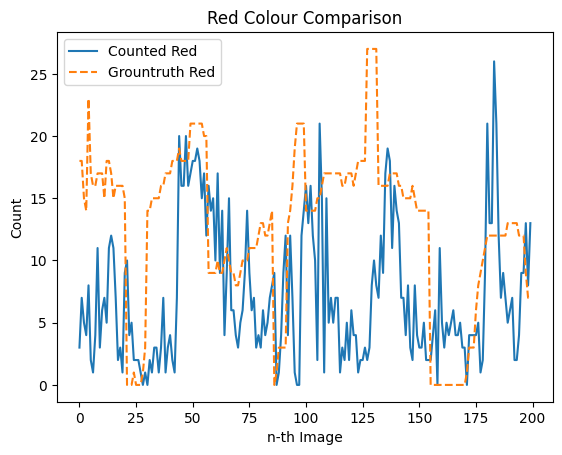

Red Colour Diffence Distance: 130.61010680647956


In [8]:
plt.plot(redCount, label = "Counted Red", linestyle="-")
plt.plot(colour_groundtruth['Red'], label = "Grountruth Red", linestyle="--")
plt.xlabel("n-th Image")
plt.ylabel("Count")
plt.title('Red Colour Comparison')
plt.legend()
plt.show()

print("Red Colour Diffence Distance:", math.dist(redCount, colour_groundtruth['Red']))

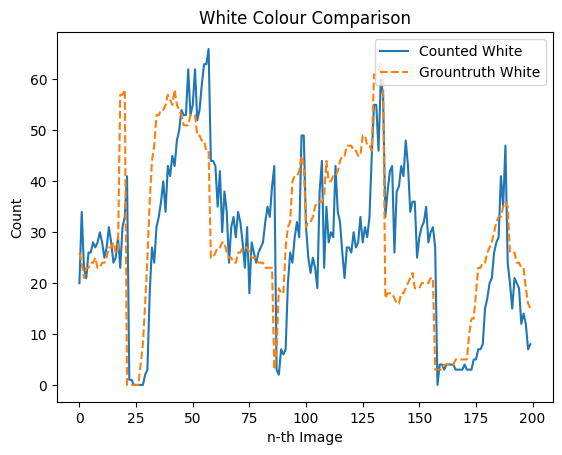

White Colour Diffence Distance: 180.50761756779133


In [9]:
plt.plot(whiteCount, label = "Counted White", linestyle="-")
plt.plot(colour_groundtruth['White'], label = "Grountruth White", linestyle="--")
plt.xlabel("n-th Image")
plt.ylabel("Count")
plt.title('White Colour Comparison')
plt.legend()
plt.show()

print("White Colour Diffence Distance:", math.dist(whiteCount, colour_groundtruth['White']))

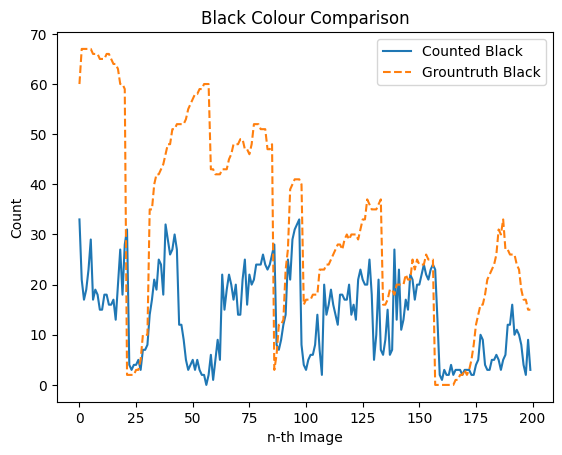

Black Colour Diffence Distance: 359.8555265658706


In [10]:
plt.plot(blackCount, label = "Counted Black", linestyle="-")
plt.plot(colour_groundtruth['Black'], label = "Grountruth Black", linestyle="--")
plt.xlabel("n-th Image")
plt.ylabel("Count")
plt.title('Black Colour Comparison')
plt.legend()
plt.show()

print("Black Colour Diffence Distance:", math.dist(blackCount, colour_groundtruth['Black']))

# 2.  Classify parked car and  moving car 

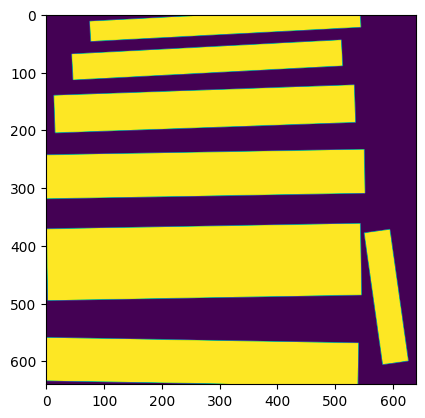

In [5]:
# Create a mask for area
mask1 = np.zeros(img.shape[:2], np.uint8)
mask1[0:35, 92:560] = 255
height, width = mask1.shape
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 3, 1)
rotated_mask1 = cv2.warpAffine(mask1, rotation_matrix, (width, height))

mask2 = np.zeros(img.shape[:2], np.uint8)
mask2[55:100, 58:525] = 255
height, width = mask2.shape
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 3, 1)
rotated_mask2 = cv2.warpAffine(mask2, rotation_matrix, (width, height))

mask3 = np.zeros(img.shape[:2], np.uint8)
mask3[130:195, 20:540] = 255
height, width = mask3.shape
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 2, 1)
rotated_mask3 = cv2.warpAffine(mask3, rotation_matrix, (width, height))

mask4 = np.zeros(img.shape[:2], np.uint8)
mask4[238:314, 0:552] = 255
height, width = mask3.shape
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 1, 1)
rotated_mask4 = cv2.warpAffine(mask4, rotation_matrix, (width, height))

mask5 = np.zeros(img.shape[:2], np.uint8)
mask5[366:490, 0:543] = 255
height, width = mask5.shape
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 1, 1)
rotated_mask5 = cv2.warpAffine(mask5, rotation_matrix, (width, height))

mask6 = np.zeros(img.shape[:2], np.uint8)
mask6[565:650, 0:545] = 255
height, width = mask6.shape
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), -1, 1)
rotated_mask6 = cv2.warpAffine(mask6, rotation_matrix, (width, height))

mask7 = np.zeros(img.shape[:2], np.uint8)
mask7[410:680, 540:585] = 255
height, width = mask7.shape
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 8, 1)
rotated_mask7 = cv2.warpAffine(mask7, rotation_matrix, (width, height))

primary_mask = rotated_mask1 | rotated_mask2 | rotated_mask3 | rotated_mask4 | rotated_mask5 | rotated_mask6 | rotated_mask7
plt.imshow(primary_mask)

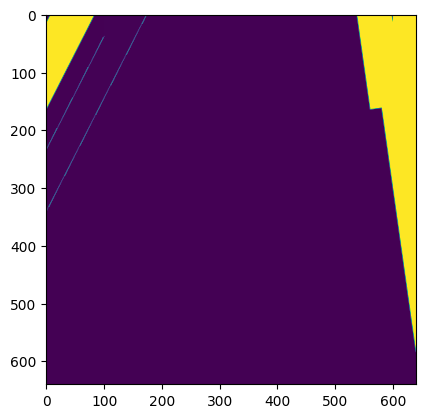

In [6]:
# mask for outlier
mask8 = np.zeros(img.shape[:2], np.uint8)
mask8[0:680, 600:650] = 255
height, width = mask8.shape
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 8, 1)
rotated_mask8 = cv2.warpAffine(mask8, rotation_matrix, (width, height))

mask9 = np.zeros(img.shape[:2], np.uint8)
mask9[0:300, 600:650] = 255
height, width = mask9.shape
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 0, 1)
rotated_mask9 = cv2.warpAffine(mask9, rotation_matrix, (width, height))

mask11 = np.zeros(img.shape[:2], np.uint8)
mask11[0:200, 580:650] = 255
height, width = mask11.shape
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 8, 1)
rotated_mask11 = cv2.warpAffine(mask11, rotation_matrix, (width, height))

mask10 = np.zeros(img.shape[:2], np.uint8)
mask10[0:400, 0:100] = 255
height, width = mask10.shape
rotation_matrix = cv2.getRotationMatrix2D((width / 32, height / 32), -27, 1)
rotated_mask10 = cv2.warpAffine(mask10, rotation_matrix, (width, height))

mask13 = np.zeros(img.shape[:2], np.uint8)
mask13[0:40, 20:100] = 255
height, width = mask13.shape
rotation_matrix = cv2.getRotationMatrix2D((width / 4, height / 4), 0, 1)
rotated_mask13 = cv2.warpAffine(mask13, rotation_matrix, (width, height))

mask12 = np.zeros(img.shape[:2], np.uint8)
mask12[0:400, 20:100] = 255
height, width = mask12.shape
rotation_matrix = cv2.getRotationMatrix2D((width / 4, height / 4), -27, 1)
rotated_mask12 = cv2.warpAffine(mask12, rotation_matrix, (width, height))

top_right_mask = rotated_mask8 | rotated_mask9 | rotated_mask11
top_left_mask = rotated_mask13 | rotated_mask10 
top_left_mask = top_left_mask - rotated_mask12

out_mask = top_left_mask | top_right_mask
plt.imshow(out_mask)

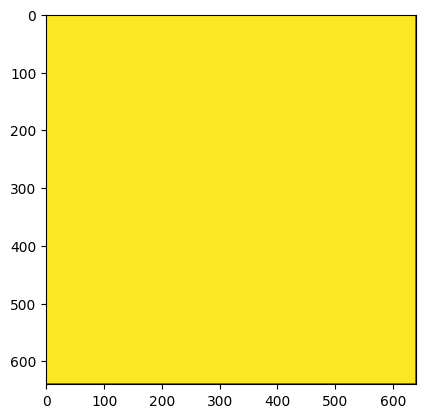

In [7]:
# create a full mask
mask_move = np.zeros(img.shape[:2], np.uint8)
mask_move[0:639, 0:639] = 255
height, width = mask_move.shape
rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 0, 1)
rotated_mask_move = cv2.warpAffine(mask_move, rotation_matrix, (width, height))
plt.imshow(rotated_mask_move)
plt.show()

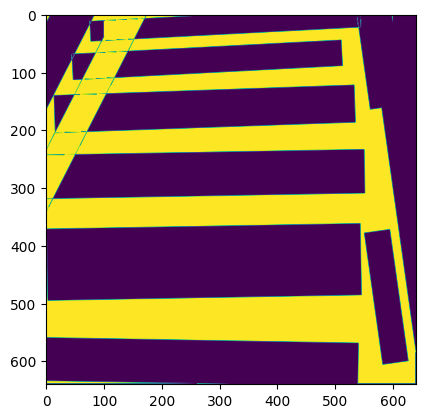

In [8]:
# substraction with the outlier and the parking detection for moving car detection
mask_move = mask_move - out_mask 
result_out = mask_move - primary_mask
plt.imshow(result_out)

In [9]:
total_parking_cars = []
total_moving_cars = []
total_cars = []

for img in image_list[0:200]:

    # Apply mask for parking cars
    parking_masked_img = cv2.bitwise_and(img, img, mask=primary_mask)
    parking_masked_img = cv2.cvtColor(parking_masked_img, cv2.COLOR_BGR2GRAY)

    # Apply threshold for parking cars
    _, parking_thresh = cv2.threshold(parking_masked_img, 170, 255, cv2.THRESH_BINARY)

    # Find contours for parking cars
    parking_contours, _ = cv2.findContours(parking_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours for parking cars
    parking_filtered_contours = []
    for contour in parking_contours:
        if cv2.contourArea(contour) > 10 and cv2.contourArea(contour) < 1000:
            parking_filtered_contours.append(contour)

    moving_masked_img = cv2.bitwise_and(img, img, mask=result_out)
    moving_masked_img = cv2.cvtColor(moving_masked_img, cv2.COLOR_BGR2GRAY)
    
    num_parking_cars = len(parking_filtered_contours)
    
    # Apply threshold for moving cars
    _, moving_thresh = cv2.threshold(moving_masked_img, 240, 255, cv2.THRESH_BINARY)

    # Find contours for moving cars
    moving_contours, _ = cv2.findContours(moving_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours for moving cars
    moving_filtered_contours = []
    for contour in moving_contours:
        if cv2.contourArea(contour) > 10 and cv2.contourArea(contour) < 1000:
            moving_filtered_contours.append(contour)

    # Count moving cars
    num_moving_cars = len(moving_filtered_contours)
    
    # Total number of cars
    num_cars = num_parking_cars + num_moving_cars
    
    # Append results to the arrays
    total_parking_cars.append(num_parking_cars)
    total_moving_cars.append(num_moving_cars)
    total_cars.append(num_cars)

In [10]:
print (total_cars)

[85, 161, 111, 96, 156, 91, 115, 111, 125, 156, 158, 149, 151, 132, 133, 135, 145, 139, 135, 156, 178, 207, 8, 5, 2, 2, 1, 1, 4, 13, 21, 88, 123, 152, 177, 195, 199, 206, 197, 205, 206, 223, 208, 228, 260, 263, 266, 300, 369, 305, 320, 372, 309, 316, 319, 393, 382, 335, 195, 200, 185, 159, 165, 130, 172, 125, 114, 118, 122, 118, 126, 127, 130, 126, 124, 119, 126, 118, 102, 105, 114, 127, 128, 138, 137, 144, 161, 11, 14, 36, 42, 36, 113, 200, 212, 264, 176, 185, 336, 392, 155, 93, 98, 103, 87, 83, 161, 247, 127, 189, 143, 153, 128, 177, 149, 129, 103, 114, 115, 113, 135, 129, 137, 143, 140, 120, 127, 142, 151, 166, 458, 392, 334, 396, 370, 141, 140, 155, 193, 112, 126, 118, 128, 149, 152, 157, 115, 119, 115, 101, 100, 94, 101, 119, 125, 128, 116, 128, 0, 10, 11, 5, 6, 7, 7, 7, 7, 7, 7, 9, 7, 8, 8, 9, 21, 25, 28, 26, 42, 100, 81, 135, 137, 159, 188, 192, 296, 346, 381, 84, 139, 92, 86, 106, 91, 55, 90, 65, 34, 28]


In [11]:
print(total_parking_cars)

[83, 150, 97, 95, 145, 91, 115, 109, 118, 141, 143, 132, 139, 125, 122, 129, 140, 134, 134, 148, 177, 202, 8, 5, 2, 2, 1, 1, 4, 13, 21, 86, 117, 149, 172, 193, 198, 201, 197, 205, 204, 222, 205, 222, 246, 248, 248, 277, 336, 279, 295, 344, 287, 295, 296, 366, 353, 310, 188, 193, 176, 152, 158, 129, 170, 125, 114, 117, 120, 115, 122, 124, 125, 120, 120, 115, 123, 116, 100, 104, 110, 125, 126, 135, 134, 140, 159, 11, 14, 33, 37, 33, 107, 185, 204, 252, 172, 182, 301, 354, 148, 93, 98, 103, 87, 83, 154, 238, 125, 183, 138, 140, 125, 161, 146, 127, 103, 113, 113, 112, 134, 128, 135, 140, 135, 120, 127, 141, 151, 163, 427, 366, 317, 363, 337, 136, 138, 149, 183, 112, 124, 118, 125, 146, 149, 155, 115, 119, 115, 101, 100, 94, 101, 119, 124, 127, 115, 128, 0, 10, 11, 5, 6, 7, 7, 7, 7, 7, 7, 9, 7, 8, 8, 9, 21, 25, 28, 26, 38, 89, 75, 120, 127, 141, 161, 169, 263, 310, 341, 78, 134, 87, 82, 102, 87, 52, 86, 62, 33, 27]


In [12]:
print(total_moving_cars)

[2, 11, 14, 1, 11, 0, 0, 2, 7, 15, 15, 17, 12, 7, 11, 6, 5, 5, 1, 8, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 6, 3, 5, 2, 1, 5, 0, 0, 2, 1, 3, 6, 14, 15, 18, 23, 33, 26, 25, 28, 22, 21, 23, 27, 29, 25, 7, 7, 9, 7, 7, 1, 2, 0, 0, 1, 2, 3, 4, 3, 5, 6, 4, 4, 3, 2, 2, 1, 4, 2, 2, 3, 3, 4, 2, 0, 0, 3, 5, 3, 6, 15, 8, 12, 4, 3, 35, 38, 7, 0, 0, 0, 0, 0, 7, 9, 2, 6, 5, 13, 3, 16, 3, 2, 0, 1, 2, 1, 1, 1, 2, 3, 5, 0, 0, 1, 0, 3, 31, 26, 17, 33, 33, 5, 2, 6, 10, 0, 2, 0, 3, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 11, 6, 15, 10, 18, 27, 23, 33, 36, 40, 6, 5, 5, 4, 4, 4, 3, 4, 3, 1, 1]


### Performance Evaluation

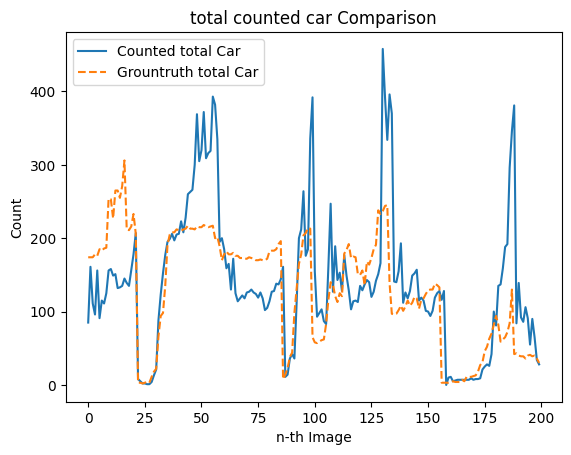

Total Car Diffence Distance: 1108.4326772519837


In [13]:
plt.plot(total_cars, label = "Counted total Car", linestyle="-")
plt.plot(Cars_groundtruth['Total Cars'], label = "Grountruth total Car", linestyle="--")
plt.xlabel("n-th Image")
plt.ylabel("Count")
plt.title('total counted car Comparison')
plt.legend()
plt.show()

print("Total Car Diffence Distance:", math.dist(total_cars, Cars_groundtruth['Total Cars']))

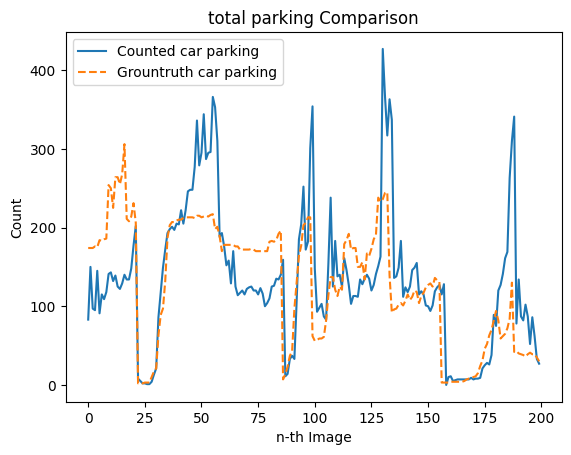

Total Parking Car Diffence Distance: 1013.5186234105421


In [14]:
plt.plot(total_parking_cars, label = "Counted car parking", linestyle="-")
plt.plot(Cars_groundtruth['Parking Cars'], label = "Grountruth car parking", linestyle="--")
plt.xlabel("n-th Image")
plt.ylabel("Count")
plt.title('total parking Comparison')
plt.legend()
plt.show()

print("Total Parking Car Diffence Distance:", math.dist(total_parking_cars, Cars_groundtruth['Parking Cars']))

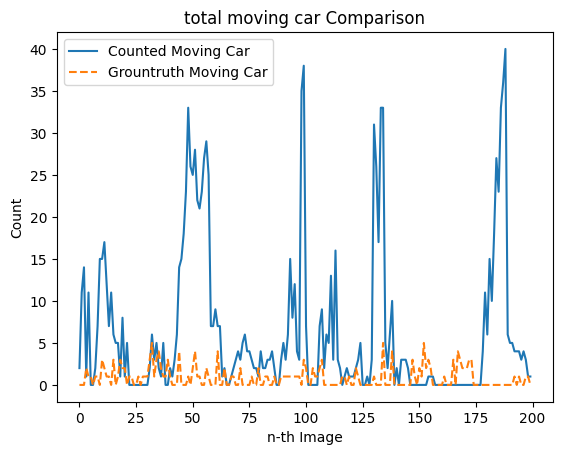

Total Moving Car Diffence Distance: 151.9309053484511


In [15]:
plt.plot(total_moving_cars, label = "Counted Moving Car", linestyle="-")
plt.plot(Cars_groundtruth['Moving Cars'], label = "Grountruth Moving Car", linestyle="--")
plt.xlabel("n-th Image")
plt.ylabel("Count")
plt.title('total moving car Comparison')
plt.legend()
plt.show()

print("Total Moving Car Diffence Distance:", math.dist(total_moving_cars, Cars_groundtruth['Moving Cars']))

# 3. Car detection using Yolo algorithm 

 Define the input directory and read all images

In [2]:
images = [cv2.imread(os.path.join("Parking Lot Dataset/", f)) for f in os.listdir("Parking Lot Dataset/") if f.endswith(".jpg")]

Define all used lists

In [3]:
results = []
sample = []
classes = []

Load the pre-trained YOLOv3 model

In [7]:
net = cv2.dnn.readNetFromDarknet("yolov3.cfg", "yolov3.weights")
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

Define the only class of interest: "car"

In [8]:
class_idx = classes.index("car")
colors = np.random.uniform(0, 255, size=(len(classes), 3))

Process each image

In [9]:
for image in images:

    height, width, channels = image.shape
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)
    confidences_boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.35 and class_id == class_idx:
                # Object detected is a car with high confidence
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                confidences_boxes.append((x, y, w, h))
                
    car_counter = 0
    for i, box in enumerate(confidences_boxes):
        x, y, w, h = box
        cv2.rectangle(image, (x, y), (x + w, y + h), colors[class_idx], 2)
        cv2.putText(image, "Car", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, colors[class_idx], 2)
        car_counter = i 
    
    if car_counter > 0:
        results.append(image)
    if car_counter > 5:
        sample.append(image)


saving the results images

In [12]:
for i, image in enumerate(results):
    cv2.imwrite("yolo results/image_" + str(i) + ".jpg", image)

saving the samples images

In [13]:
for i, image in enumerate(sample):
    cv2.imwrite("yolo samples/image_" + str(i) + ".jpg", image)

Groundtruth

In [5]:
car_numbers = pd.DataFrame()
car_numbers['counter'] = car_counter

NameError: name 'car_counter' is not defined

In [4]:
plt.plot(car_numbers['counter'].head(200), label = "Counted car", linestyle="-")
plt.plot(yolo_Groundtruth['number of cars'], label = "Grountruth of cars", linestyle="--")
plt.xlabel("n-th Image")
plt.ylabel("Count")
plt.title('total cars Comparison')
plt.legend()
plt.show()

NameError: name 'car_numbers' is not defined